# <font color='#000000'>Students_Study_Hours_and_Scores<font><a class='anchor' id='top'></a>

## <font color='289C4E'>Understanding the Prediction between Study Hours and Score<font><a class='anchor' id='top'></a>

### Table of Contents
    
* [1. Aim and Objective](#chapter1)

* [2. Data Health Review](#chapter2)
	* [2.1 Importing Libraries](#chapter2.1)
	* [2.2 Importing the Data](#chapter2.2)
	* [2.3 Data Cleaning and Preprocessing](#chapter2.3)

* [3. Exploratory Data Analysis](#chapter3)
	* [3.1 Data Frequency Understanding](#chapter3.1)
	* [3.2 Univariate Analysis](#chapter3.2)
	* [3.3 Bivariate Analysis](#chapter3.3)
	* [3.4 Pearson correlation coefficient](#chapter3.4)

* [4. Spliting the data and Fitting the Model](#chapter4)
	* [4.1 Spliting the data](#chapter4.1)
	* [4.2 Fitting the Linear Regression algorithm in Model](#chapter4.2)

* [5. Reading Using Metrics](#chapter5)
	* [5.1 Reading using SKLearn Metrics](#chapter5.1)
	* [5.2 Reading using Statsmodel Metrics](#chapter5.2)

* [6. Conclusion](#chapter6)

## 1. Aim and Objective <a class="anchor" id="chapter1"></a>

**Aim**

The aim of conducting a linear regression analysis for students' marks and their study hours is to understand the relationship between these two variables and determine if there exists a linear association.

**Objective**

The objective is to quantify the strength and direction of the relationship, assess the significance of the relationship statistically, and develop a predictive model that can estimate a student's marks based on their study hours.

This analysis can provide insights into the impact of study hours on academic performance and aid in identifying factors that contribute to higher or lower marks. Ultimately, the goal is to inform educational strategies and interventions that can optimize students' study habits and improve their academic outcomes.

## 2. Data Health Review <a class="anchor" id="chapter2"></a>

## 2.1 Importing Libraries <a class="anchor" id="chapter2.1"></a>

In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
import statsmodels.formula.api as smf


## 2.2 Importing the Data <a class="anchor" id="chapter2.2"></a>

In [2]:
df = pd.read_csv('Students_Study_score.csv')

df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


## 2.3 Data Cleaning and Preprocessing <a class="anchor" id="chapter2.3"></a>

In [3]:
df.duplicated().sum()

0

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

## 2.4 Data Statistical Summary <a class="anchor" id="chapter2.4"></a>

#### Understanding the Statistical summary of Object and numeric data

In [6]:
df.agg({'mean', 'median', lambda x: x.mode().iloc[0]})

,Hours,Scores
median,4.800,47.00
mean,5.012,51.48
<lambda>,2.500,30.00


In [7]:
df.describe(include = 'all')

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# 3. Exploratory Data Analysis <a class="anchor" id="chapter3"></a>

## 3.1 Data Frequency Understanding <a class="anchor" id="chapter3.1"></a>

In [8]:
for column in df.columns:
    nunique = df[column].nunique()
    print('The name of the column is: ', column)
    print('The nunique features in ' + column + ' is: ', df[column].nunique())
    print('*'*35)

The name of the column is:  Hours
The nunique features in Hours is:  23
***********************************
The name of the column is:  Scores
The nunique features in Scores is:  23
***********************************


## 3.2 Univariate Analysis <a class="anchor" id="chapter3.2"></a>

In [9]:
df.columns

Index(['Hours', 'Scores'], dtype='object')

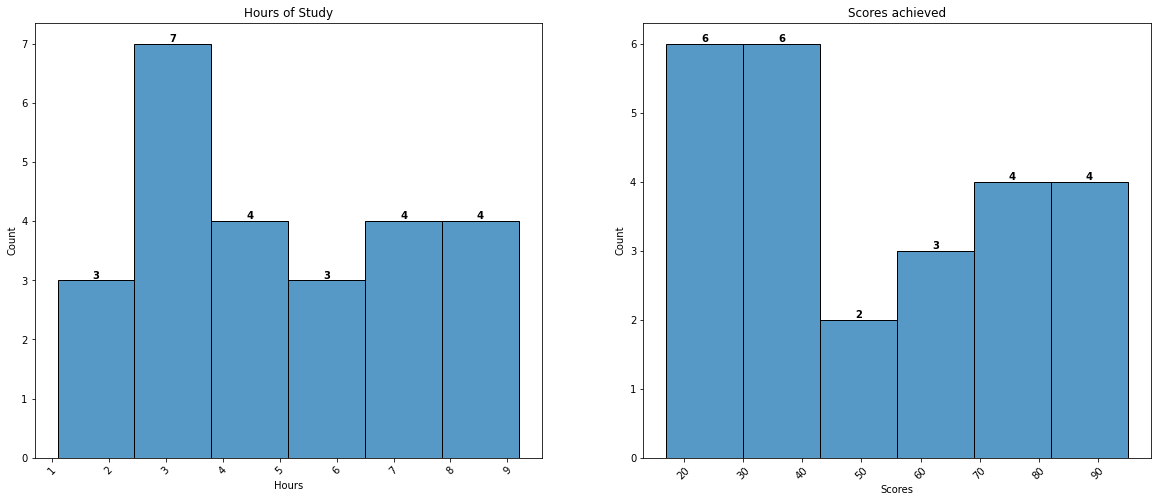

In [10]:
plt.figure(figsize = (20,8))

plt.subplot(1,2,1)
ax = sns.histplot(x = 'Hours', data = df)
for i in ax.containers:
    i.datavalues
    ax.bar_label(i,weight = "bold")
plt.xticks(rotation=45)
plt.title("Hours of Study")

plt.subplot(1,2,2)
ax = sns.histplot(x = 'Scores', data = df)
for i in ax.containers:
    i.datavalues
    ax.bar_label(i,weight="bold")
plt.xticks(rotation=45)
plt.title("Scores achieved")


plt.show()

## 3.3 Bivariate Analysis <a class="anchor" id="chapter3.3"></a>

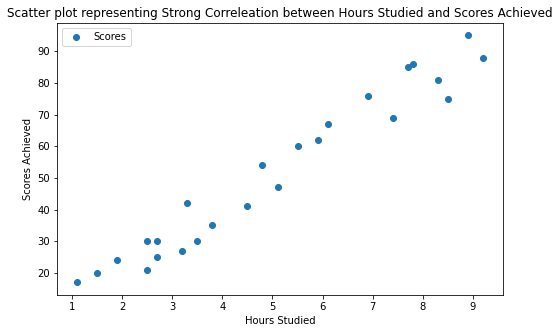

In [11]:
plt.figure(figsize = (8,5))
plt.scatter(x = 'Hours', y = 'Scores', data = df)
plt.xlabel('Hours Studied')
plt.ylabel('Scores Achieved')
plt.title('Scatter plot representing Strong Correleation between Hours Studied and Scores Achieved')


plt.legend();

# 4. Spliting the data and Fitting the model <a class="anchor" id="chapter4"></a>

## 4.1 Spliting the data <a class="anchor" id="chapter4.1"></a>

In [12]:
X = df['Hours']
y = df['Scores']

In [13]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size = 0.7, random_state = 20)

In [14]:
X_train = pd.DataFrame(X_train)
X_train.shape

(17, 1)

In [15]:
X_test = pd.DataFrame(X_test)
X_test.shape

(8, 1)

In [16]:
y_train = pd.DataFrame(y_train)
y_train.shape

(17, 1)

In [17]:
y_test

19    69
23    76
12    41
4     30
18    67
1     47
13    42
16    30
Name: Scores, dtype: int64

## 4.2 Fitting the Linear Regression algorithm in model <a class="anchor" id="chapter4.2"></a>

In [18]:
lr = LinearRegression()

lr.fit(X_train,y_train)

LinearRegression()

In [19]:
y_pred = lr.predict(X_test)
y_pred

array([[75.0306038 ],
       [70.12457032],
       [46.57560965],
       [36.7635427 ],
       [62.27491676],
       [52.46284982],
       [34.80112931],
       [26.95147575]])

In [20]:
lr.coef_

array([[9.81206695]])

In [21]:
lr.intercept_

array([2.42130838])

In [22]:
x_range = [i for i in range(len(y_test))]
x_range

[0, 1, 2, 3, 4, 5, 6, 7]

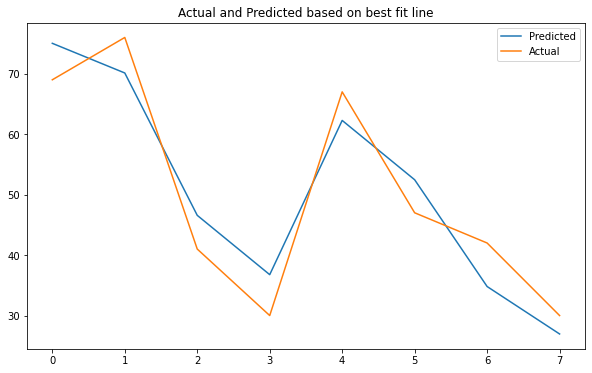

In [23]:
plt.figure(figsize = (10,6))

plt.plot(x_range,y_pred)
plt.plot(x_range,y_test)

plt.legend(['Predicted','Actual'])
plt.title('Actual and Predicted based on best fit line')

plt.show()

# 5. Reading Using Metrics <a class="anchor" id="chapter5"></a>

## 5.1 Reading using SKLearn Metrics <a class="anchor" id="chapter5.1"></a>

In [24]:
from sklearn.metrics import r2_score, mean_squared_error

In [25]:
print(mean_squared_error(y_test,y_pred))
print(r2_score(y_test,y_pred))

32.626020980386755
0.8854976232318078


## 5.2 Reading using Statsmodel Metrics <a class="anchor" id="chapter5.2"></a>

In [26]:
import statsmodels.formula.api as smf

In [27]:
df.columns

Index(['Hours', 'Scores'], dtype='object')

In [28]:
result = smf.ols(formula = 'Scores ~ Hours', data = df).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 Scores   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     465.8
Date:                Thu, 08 Jun 2023   Prob (F-statistic):           9.13e-17
Time:                        20:39:41   Log-Likelihood:                -77.514
No. Observations:                  25   AIC:                             159.0
Df Residuals:                      23   BIC:                             161.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.4837      2.532      0.981      0.3

## 6. Conclusion <a class="anchor" id="chapter6"></a>

**Takeaways**

The R-squared value of 0.953 indicates that the scores can be accurately predicted using the number of hours studied as an independent variable. This high R-squared value suggests a strong relationship between the two variables, indicating that the number of hours studied has a significant impact on the scores achieved. Additionally, the Adj. R-squared value further reinforces the predictive power of the model by accounting for the number of variables and degrees of freedom in the analysis. Overall, these scores provide valuable insights into the dependency of scores on the number of hours studied.

# Thank You